<a href="https://colab.research.google.com/github/szsavery/DSPS_SSavery/blob/main/HW7/clusteringGenes_SaveryDSPS2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install umap-learn
!pip install umap-learn[plot]

In [ ]:
import numpy as np
import pandas as pd
import pylab as plt
import scipy as sp
import sklearn as skl
from sklearn import cluster
import umap
import umap.plot
from scipy.cluster.hierarchy import dendrogram, linkage

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/umap/plot.py:203: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit(nopython=False)
/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


# I  read the data
in https://github.com/fedhere/DSPS_FBianco/tree/master/HW7
its called kidpackgene.csv

In [ ]:
genes = pd.read_csv("https://raw.githubusercontent.com/fedhere/DSPS_FBianco/main/HW7/kidpackgenes.csv", index_col = 0)

genes.head()

,1,2,3,4,5,6,7,8,10,11,...,76,77,78,79,81,83,84,85,86,87
1,-0.146342,-0.520637,0.175828,-0.323736,0.172691,0.025156,0.024812,0.172268,0.207188,0.026710,...,0.240705,-0.347746,-0.001797,-0.260594,0.105968,0.110885,-0.006975,0.550118,0.118934,0.327248
2,-0.465767,0.155823,0.226344,-0.547542,0.041096,0.137012,0.102497,-0.034277,0.500871,0.005533,...,0.371435,-0.447105,-0.134904,-0.250699,0.164698,-0.035022,0.250384,0.463746,-0.514230,0.200956
3,-0.088964,-0.208241,-0.151039,-0.288229,-0.425568,0.121006,-0.097883,-0.007597,0.329636,-0.222495,...,-0.014990,-0.458297,-0.050852,-0.168500,0.078716,-0.032231,-0.116947,-0.199880,-0.415793,-0.032004
4,-0.327696,-1.714948,0.068710,-0.168257,-0.471577,0.279013,-0.060734,-0.222574,0.658097,0.129876,...,0.153765,-0.140409,-0.119515,-0.289881,0.944493,-0.142710,-1.119866,-0.215536,0.345946,0.056442
5,-0.092327,-0.660456,0.075948,-0.646501,-0.046137,-0.010305,0.368476,-0.043832,-0.321060,0.116657,...,-0.033032,0.394082,0.173515,-0.194819,0.149131,-0.097285,-0.288192,-0.491920,-0.722120,0.055477


make sure you are not reading the index as a feature! you can control this with the index_col paramter of the function pd.read_csv or remove the column after you read the data in


make sure you show the data and look at it carefully

In [ ]:
genes.shape

(4224, 74)

# II  Explore and preprocess the data  explore the data.


## II a
missing values? (remember you can use the missingno package and visualize the missing values!). What should you do with them?

In [ ]:
import missingno as msno

<Axes: >

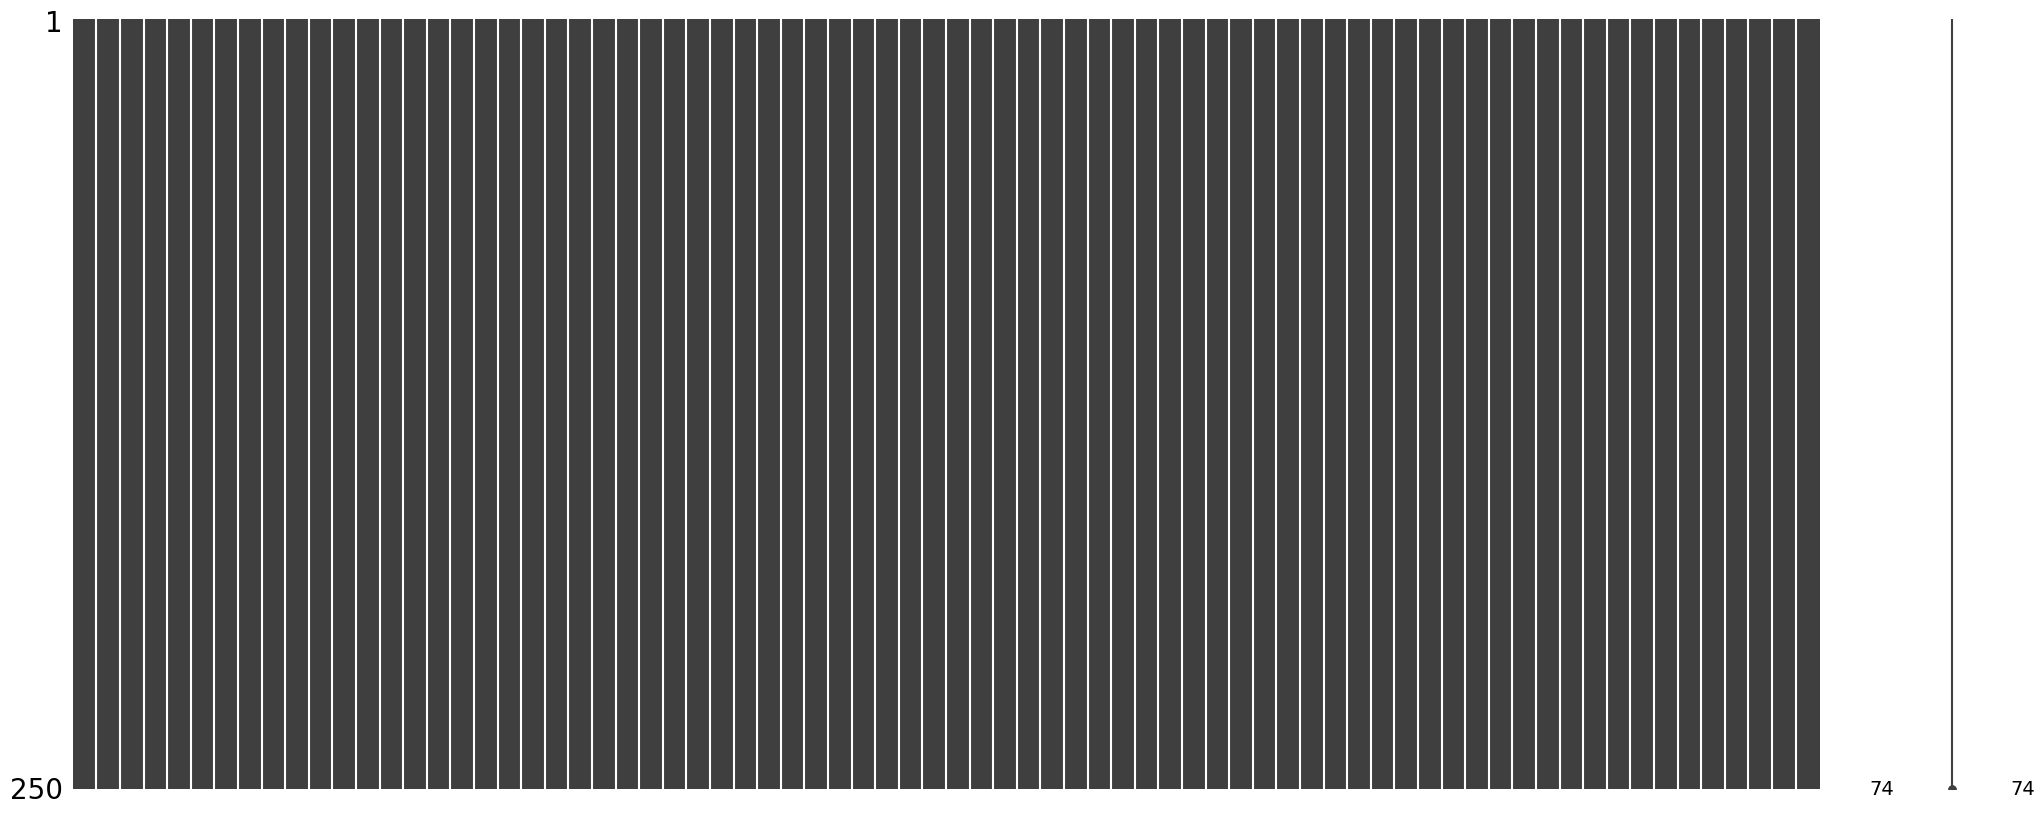

In [ ]:
msno.matrix(genes.sample(250))

There appears to be no missing data in this subsample of the data.

<Axes: >

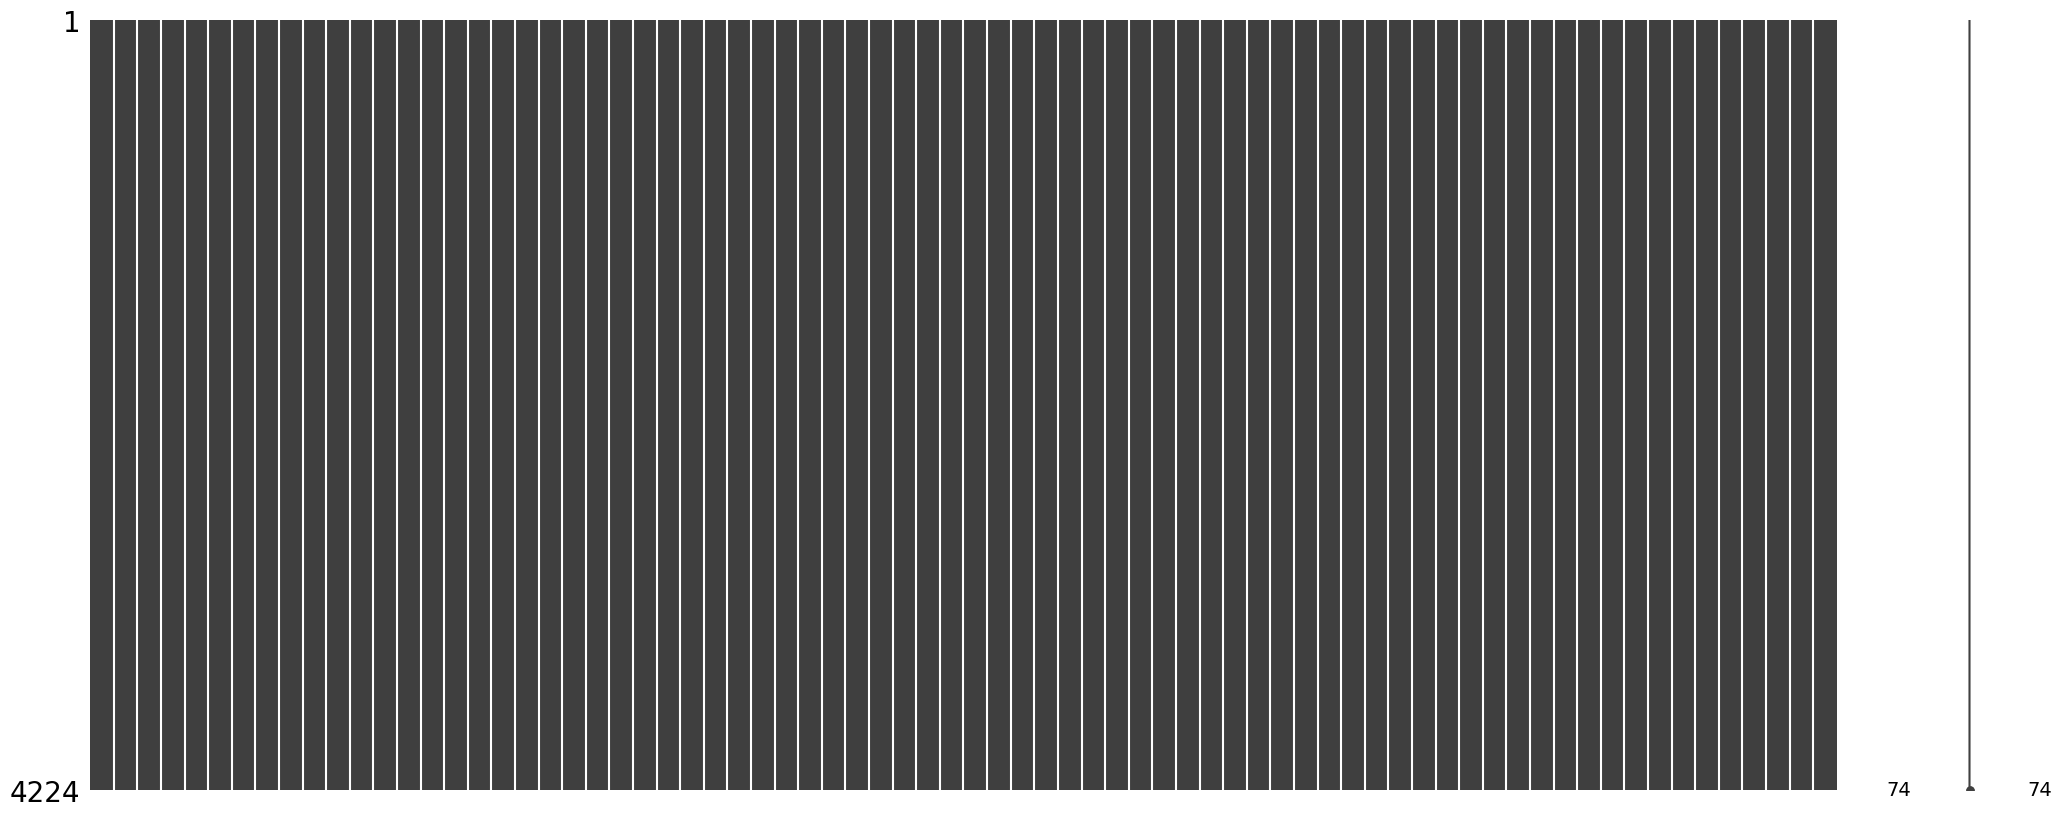

In [ ]:
msno.matrix(genes)

Examining the full dataset, there appears to be no missing values

## II b
whiten it, normalize it, scale it. What is appropriate? discuss your choices

In [ ]:
genes['1']

1      -0.146342
2      -0.465767
3      -0.088964
4      -0.327696
5      -0.092327
          ...   
4220   -0.314408
4221   -0.313823
4222   -0.091283
4223   -0.552395
4224   -0.907778
Name: 1, Length: 4224, dtype: float64

In [ ]:
genes.iloc[0][0] #First data entry in the first column

print(len(genes.iloc[0]))

74


In [ ]:
scaledgenes2 = skl.preprocessing.StandardScaler().fit_transform(genes)

In [ ]:

scaledgenes2.mean(0).round(2), scaledgenes2.std(0)

(array([ 0., -0.,  0., -0., -0., -0.,  0., -0., -0.,  0.,  0., -0.,  0.,
         0., -0.,  0., -0.,  0., -0.,  0.,  0., -0., -0.,  0.,  0.,  0.,
        -0., -0.,  0.,  0., -0.,  0., -0.,  0., -0., -0.,  0., -0., -0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0., -0.,  0.,  0.,  0.,
         0.,  0., -0.,  0., -0.,  0., -0., -0.,  0.,  0., -0.,  0.,  0.,
        -0., -0., -0.,  0., -0.,  0.,  0., -0., -0.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.]))

# III Visualize the data


## III-a calculate and plot a t-SNE projection of the data on an optimal 2D plane

In [ ]:
skl.manifold.TSNE?

The hyperparameteres perplexity and possibly early_exaggeration may significantly impact the result. Find values that give you some structure in the data. Make sure you read the docstring and info on tSNE!

In [ ]:
twodproj = skl.manifold.TSNE(n_components = 2, perplexity = 15).fit_transform(scaledgenes2)

#Tried perplexity values of 5, 10, 15, and 30. 15 and 30 seem to have similar levels of cluster, at least when examining by eye.
#Decided to use the value of 15. This leads to at least one large cluster, and then several small and medium groupings.

In [ ]:
#x
twodproj[0][0]
#y
twodproj[0][1]

-28.094303

In [ ]:
len(twodproj)

4224

In [ ]:
x_array = np.zeros(4224)
y_array = np.zeros(4224)

for i in range(0,4224):
  x_array[i] = twodproj[i][0]
  y_array[i] = twodproj[i][1]

plot the TSNE 2D projection


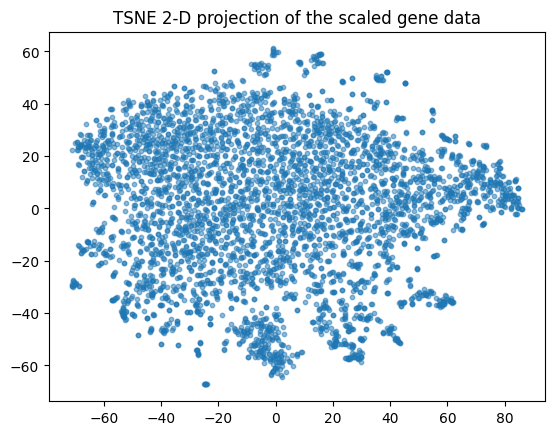

In [ ]:
plt.scatter(x_array,y_array, s = 10, alpha = 0.5)
plt.title('TSNE 2-D projection of the scaled gene data')
plt.show()

### Figure 1:

Final plot showing the t-NES projection of my scaled genes dataframe. Decided to use a perplexity value of 15, as this led to what felt like was a reasonable amount of clustering in the data when visually analyzing the plots.

## III-b calculate and plot the UMAP 2D projection

/usr/local/lib/python3.10/dist-packages/umap/plot.py:449: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(points[:, 0], points[:, 1], s=point_size, c=color)


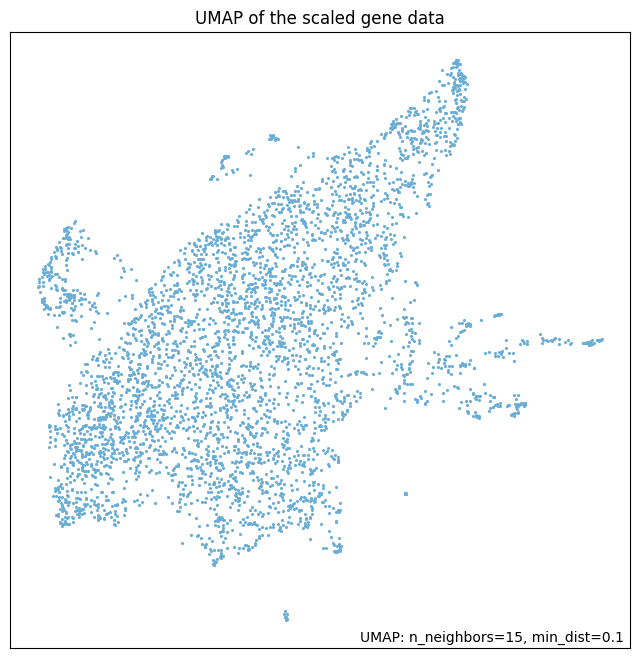

In [ ]:
mapper = umap.UMAP(n_components = 2).fit(scaledgenes2) #fit_transform was causing issues with my scaledgenes output, so just using fit
#ax = plt.subplot()
umap.plot.points(mapper)
plt.title('UMAP of the scaled gene data')
plt.show()

### Figure 2:

Plotting the UMAP projection of the scaled genes dataset. Set the number of components to 2, so that this projection als 2D like the t-NSE one. There appears to be one very large cluster, plus 2 or 3 medium sized ones, and maybe 2 or 3 small clusters.

# IV K-MEANS Clustering

## IV-a find the best number of culsters for this dataset

create a function that measures the intracluster variance

the intracluster variance is the sum of the variance of each cluster
$V =\sum_J \sum_i{(X_{i\in j} - \bar{X_j})^2}$ for $i$ points in $j$ clusters

In [ ]:
def calICVar(X, labels):
    """calculates the intracluster variance of the k-MEANS algorithm
    X: the input data (ndarray)
    labels: the labels indicating the cluster of each datapoint: same number of data as X #column names
    """
    label_var = []
    for label in np.unique(labels):
      Xmean = np.mean(X[labels == label])
      label_var.append(np.sum((X[labels == label] - Xmean)**2))

    icvar = np.sum(label_var)

    return icvar


cluster the data with K-Means using 1 to 10 clusters. Calculate the intracluster variance and look for an "elbow" in the value of the intracluster variance as a function of number of clusters/ What is the optimal number of clusters?

In [ ]:
 #list of intracluster variance values for KMeans being run with 1->10 clusters

k_means = cluster.KMeans(n_clusters = 2).fit(scaledgenes2)
k_means.cluster_centers_.shape
k_means.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, ..., 0, 1, 1], dtype=int32)

In [ ]:
vars = []
for i in range(1,11):
  kmeans = cluster.KMeans(n_clusters = i).fit(scaledgenes2)
  labels = kmeans.labels_
  vars.append(calICVar(scaledgenes2, labels))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
print(vars)

[312576.0000000001, 251076.64173410618, 231256.62978742638, 232168.6226282038, 232436.938575311, 226408.68169421615, 226868.88864825925, 224335.40433435922, 221620.1014186642, 221061.8985999187]


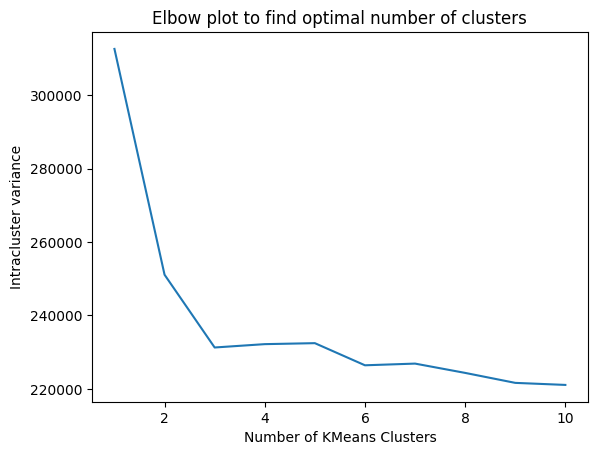

In [ ]:
# elbow plot

range_list = [1,2,3,4,5,6,7,8,9,10]
plt.plot(range_list,vars)
plt.xlabel('Number of KMeans Clusters')
plt.ylabel('Intracluster variance')
plt.title('Elbow plot to find optimal number of clusters')
plt.show()

Based on the elbow plot above (see also slides) what is the right number of clusters for this dataset? DISCUSS!

### Figure 3:
The elbow plot above is plotting the intracluster variance as the number of clusters in the KMeans test are increased. The plot shows that once the cluster number has increased past 3, the decrease in intracluster variance is much slower than before 3. This shows that 3 clusters is the correct number for this gene dataset.

## IV-b Cluster the data with k-Means into the number of clusters as determined from the elbow

In [ ]:
geneclustersKM = cluster.KMeans(n_clusters = 3).fit(scaledgenes2)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## IV-c plot and plot the t-SNY and UMAP projections of the data using the cluster number as color

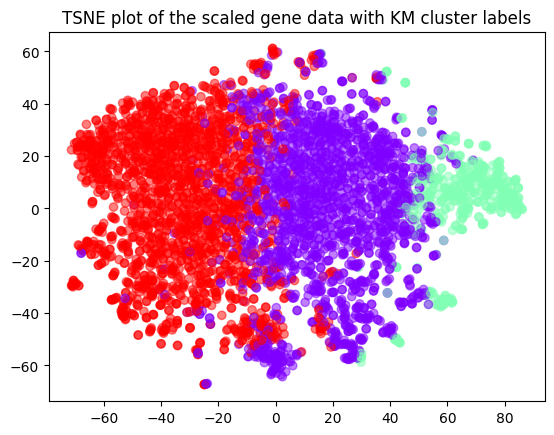

In [ ]:
plt.scatter(x_array, y_array, alpha = 0.5,c = geneclustersKM.labels_, cmap = 'rainbow')
plt.title('TSNE plot of the scaled gene data with KM cluster labels')
plt.show()

### Figure 4:

Replotting the t-SNE projection of the scaled genes data, using the KMeans cluster labels to decide the color for each point. This shows the 3 clusters that were found by the KMeans test in the data. The cluster boaders appear to have wide overlap, that is most likely due to how the t-SNE is crushing the 74 dimensons of the data down to 2. Plotting in 3-D could potentially show more spacing between the clusters.

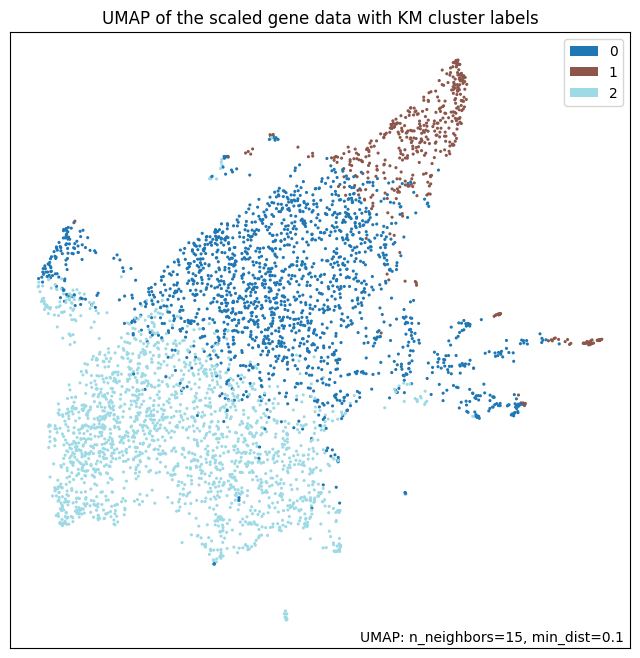

In [ ]:
umap.plot.points(mapper, labels = geneclustersKM.labels_, theme = 'blue')
plt.title('UMAP of the scaled gene data with KM cluster labels')
plt.show()

### Figure 5

Replotting the UMAP project of the data, again using the KMeans cluster labels to decide point color. This again shows that the clusters aren't super super delineated in 2-D projection.

# Use dDSCAN or hierarchical clustering (461 pick either DBSCAN or hierarchical) and redo the clustering. Can you find the same number of clusters?

# V DBSCAN Clustering


## V-a measure the distribution of Euclidean distances

It is important to choose the hyperparamters of DBSCAN wisely. Initialize the _eps_ parameter of DBSCAN based on the mean Euclidean distance. To that end, calculate and plot the Euclidean distance matrix of each point pairs if you have not yet

In [ ]:
dists_square = sp.spatial.distance.squareform(sp.spatial.distance.pdist(scaledgenes2, metric = 'Euclidean'))
dists = sp.spatial.distance.pdist(scaledgenes2, metric = 'Euclidean')

print(dists)
print(dists_square)

[4.53495137 6.45229079 8.01171518 ... 9.03260968 8.9762348  9.1764126 ]
[[ 0.          4.53495137  6.45229079 ...  9.32719813 14.30953484
  14.06698067]
 [ 4.53495137  0.          6.66977309 ...  9.30573247 13.23500628
  13.57188182]
 [ 6.45229079  6.66977309  0.         ...  8.59436177 13.48946358
  12.19740256]
 ...
 [ 9.32719813  9.30573247  8.59436177 ...  0.          9.03260968
   8.9762348 ]
 [14.30953484 13.23500628 13.48946358 ...  9.03260968  0.
   9.1764126 ]
 [14.06698067 13.57188182 12.19740256 ...  8.9762348   9.1764126
   0.        ]]


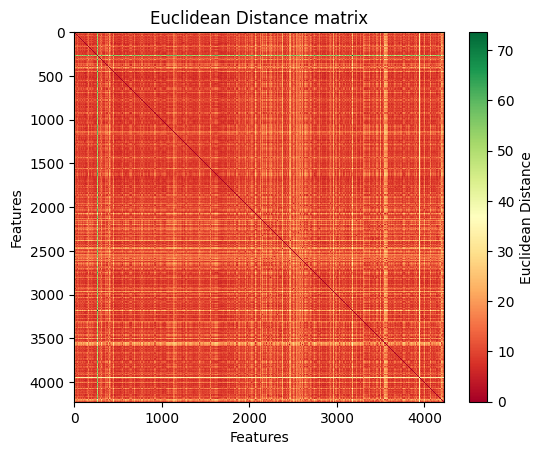

In [ ]:
plt.imshow(dists_square, cmap = 'RdYlGn', interpolation = 'none')
plt.colorbar(label = 'Euclidean Distance')
plt.title('Euclidean Distance matrix')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

### Figure 6

Plotting the Euclidean distance matrix of the scaled gene dataset. The majority of the distances appear to be 40 and under in length.

 make a histogram of the pairwise distances. You should choose a value to initialize dbscan that is below the mean

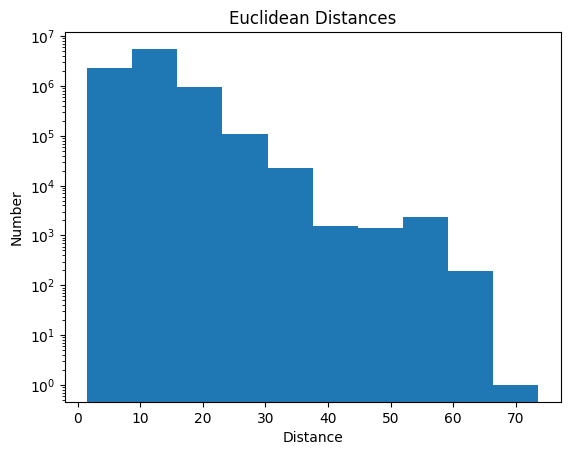

In [ ]:
plt.hist(dists)
plt.yscale('log')
plt.xlabel('Distance')
plt.ylabel('Number')
plt.title('Euclidean Distances')
plt.show()

### Figure 7

Histogram plot of the Euclidean distances. Does a better job of showing the presence of distances between 40 and 70 than Figure 6 did. Confirms that the majority of distances are below 40.

## V-b Rub DBSCAN

initialize the dbscan _eps_ hyperparameter value appropriately and fit a dbscan model to the data plot the 2D TSNE projection colorcoded as before. How many clusters do you have, how many outliers? is that a significant number?

In [ ]:
geneclustersDBS = skl.cluster.DBSCAN(eps = np.mean(dists), min_samples = 9, metric = 'euclidean').fit(scaledgenes2)

np.unique(geneclustersDBS.labels_)

array([-1,  0])

## V-c plot the data in the t-SNE and UMAP projections color-coded by DBSCAN cluster

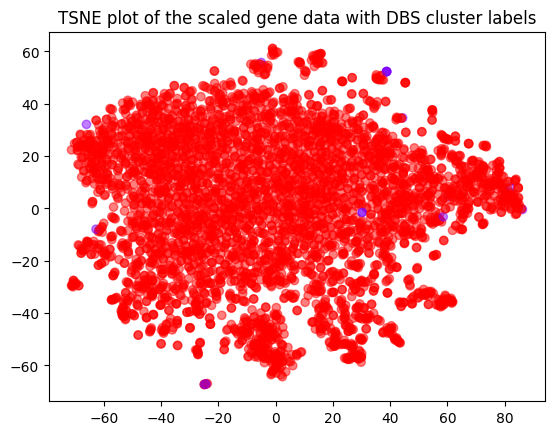

In [ ]:
plt.scatter(x_array, y_array, alpha = 0.5,c = geneclustersDBS.labels_, cmap = 'rainbow')
plt.title('TSNE plot of the scaled gene data with DBS cluster labels')
plt.show()

### Figure 8

Plotting the t-SNE projection of the scaled genes dataset, using the DBScan cluster labels for coloring. This method shows one extremely large cluster, containing the vast majority of the data points, and one cluster of outliers.

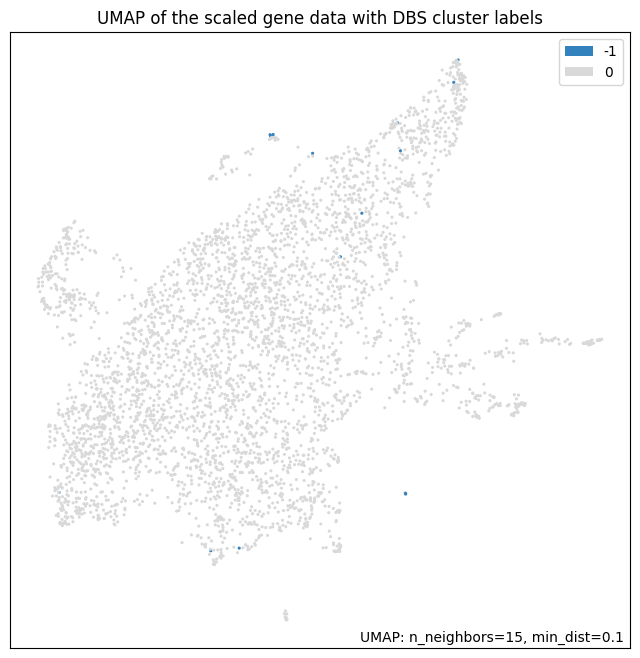

In [ ]:
umap.plot.points(mapper, labels = geneclustersDBS.labels_, theme = 'green')
plt.title('UMAP of the scaled gene data with DBS cluster labels')
plt.show()

### Figure 9

Plotting the UMAP of the scaled genes data using the DBScan cluster labels for coloring. Again shows that the vast majority of points belong in one cluster with the remaining few seemsing to be outliers.

# VI Agglomerative clustering


## VI-a run agglomerative clustering with standard distance choices: ward linkage and Euclidean distance

In [ ]:
clusteringAg = skl.cluster.AgglomerativeClustering(affinity = 'euclidean').fit(scaledgenes2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


choose ward linkage and plot the dendrogram of the clusters

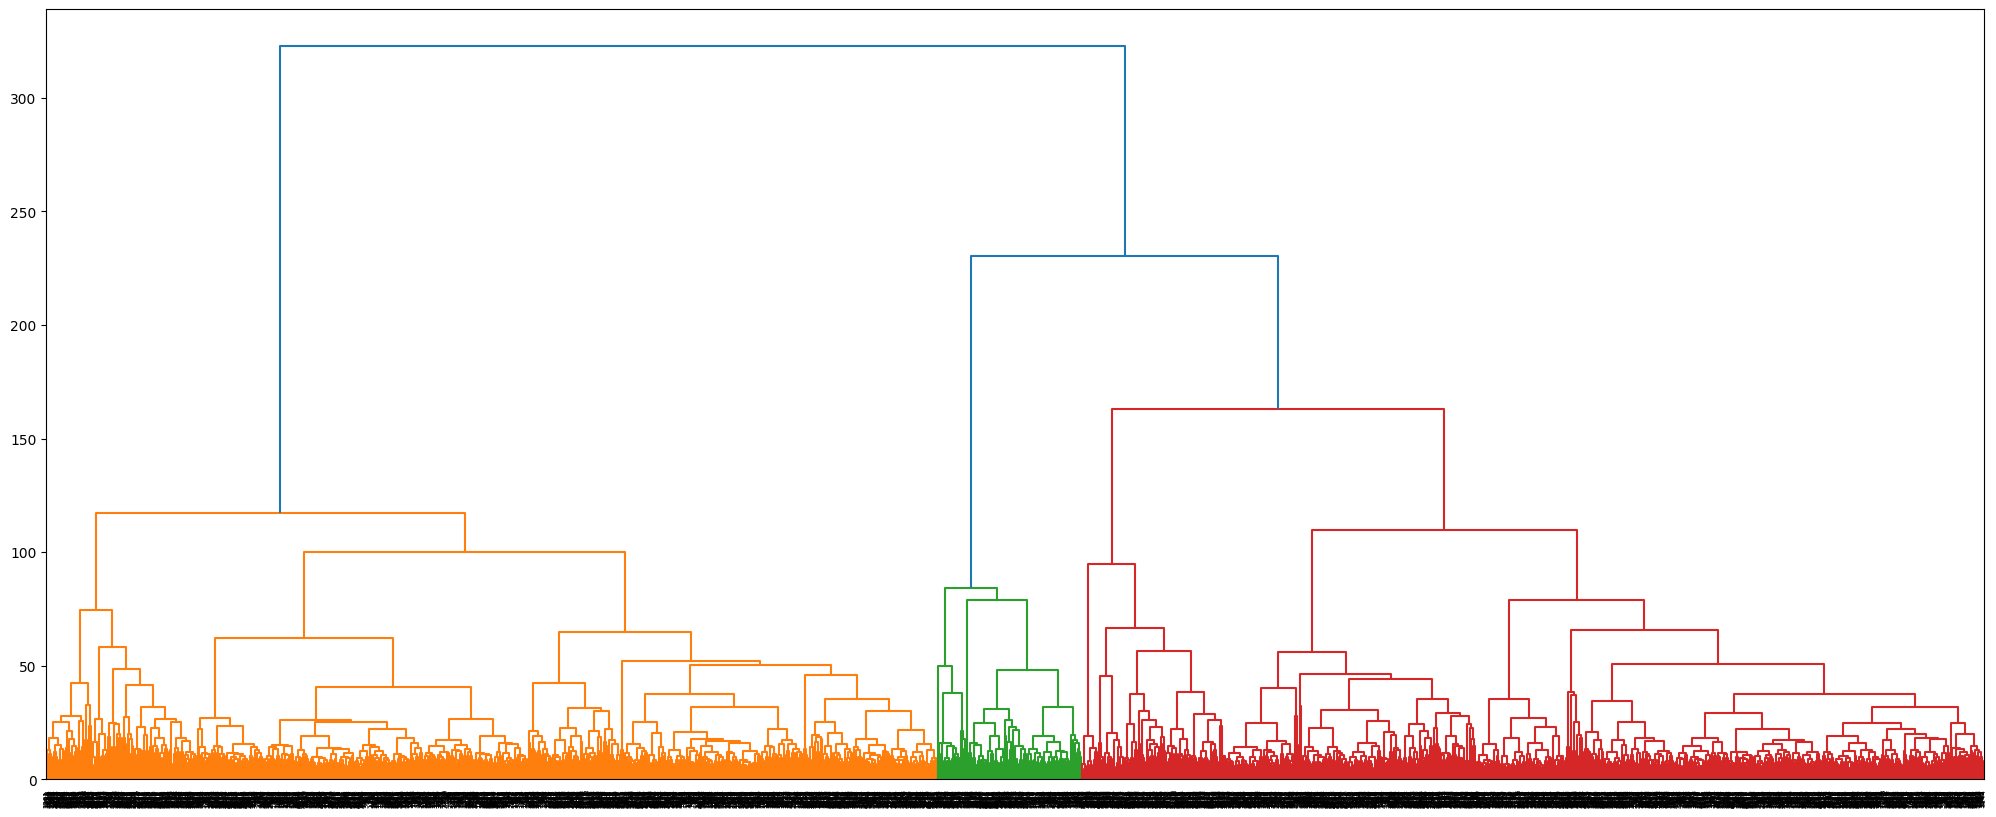

In [ ]:
Z = linkage(scaledgenes2, 'ward')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

### Figure 10

Dendrogram of the scaled genes data using the ward linkage to determine the number of clusters present. This method again found the presence of 3 clusters in the dataset, like the KMeans test did. The orange and red clusters are of roughly comparable size. The green cluster is much smaller than the other two, however the distance of its break from the red cluster shows that it is a separate cluster.

repeat with a different linkage and comment on differences

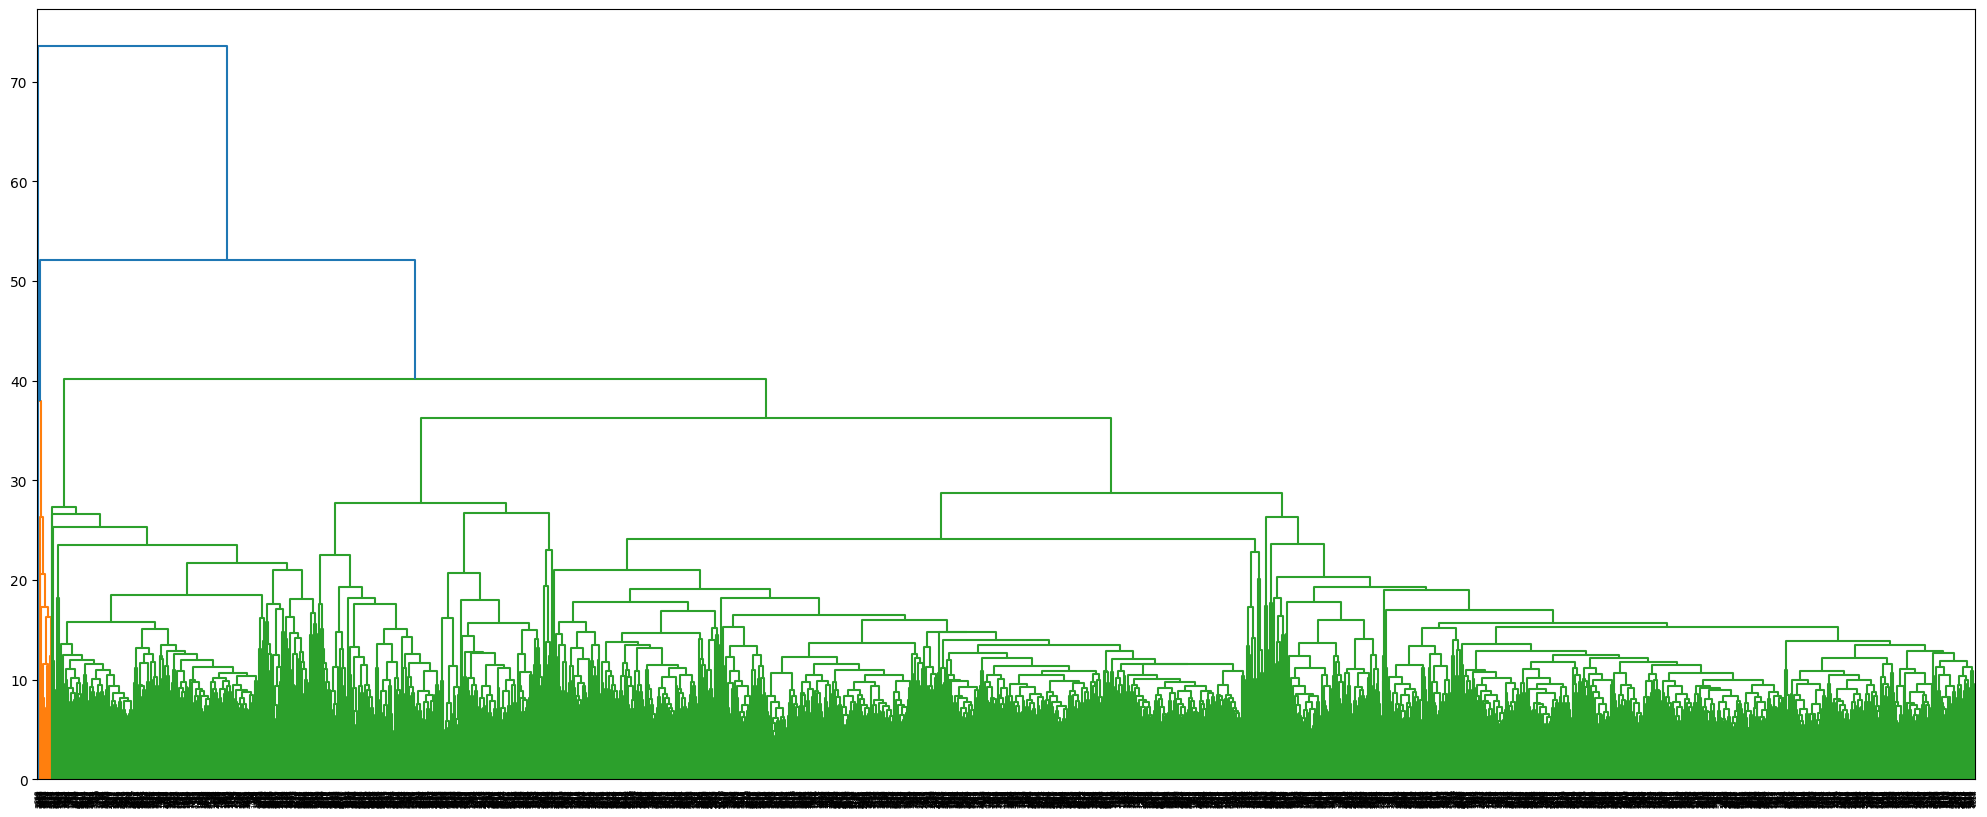

In [ ]:
Z = linkage(scaledgenes2, 'complete')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

### Figure 11

Dendrogram of the scaled genes data using the complete linkage type to determine the number clusters present. This method has now found two clusters, like the DBScan method. Again based on the size of the clusters, the second grouping could be classified as outliers.

# VI-b rerun agglomerative cluatering to get the "ideal" number of clusters as decided by k-means.



In [ ]:
geneclustersAg = skl.cluster.AgglomerativeClustering(n_clusters= 3, affinity = 'euclidean').fit(scaledgenes2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
geneclustersAg.labels_

array([0, 0, 0, ..., 1, 0, 0])

## VI-c plot the 2D TSNE projection colorcoded as before

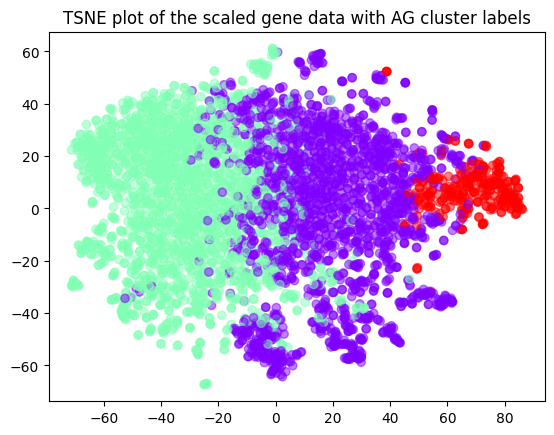

In [ ]:
plt.scatter(x_array, y_array, alpha = 0.5,c = geneclustersAg.labels_, cmap = 'rainbow')
plt.title('TSNE plot of the scaled gene data with AG cluster labels')
plt.show()

### Figure 12

Replotting the t-SNE projection of the scaled genes data using the AG clustering labels. This again shows that the clusters overlap a lot in 2-D.

# VII Comment, in the spirit of https://www.ncbi.nlm.nih.gov/pmc/articles/PMC187526, which was the most "useful" method for clustering

Seeing as the dataset contains data from renal cell cancer and there are three substypes of it, one of the clustering methods that found 3 clusters would be most useful. Therefore, I would lean toward either the KMeans clustering or the agglomerative clustering using the ward linkage methods as both found 3 clusters in the data. I personally find the dendogram plot the best for visualizing these clusters in 1D/2D out of all of the methods we have used during this homework. As such, I find the agglomerative clustering the most useful method for analyzing and visualizing this gene data.